## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Merge left on "Mouse ID"
all_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
all_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice
len(all_data["Mouse ID"].unique())


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.                  

In [4]:
# create dupe list DF
dupe_list = pd.DataFrame(all_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False))
dupe_list


,0
0,False
1,False
2,False
3,False
4,False
...,...
1888,False
1889,False
1890,False
1891,False


In [5]:
# merge dupe_list with all-data
dupe_check_df = pd.concat([all_data, dupe_list.reindex(all_data.index)], axis=1)

dupe_check_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,0
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [6]:
dupes_isolated = dupe_check_df.loc[dupe_check_df[0] == True]
dupes_isolated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,0
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
all_data_cleaned = all_data.loc[all_data['Mouse ID'] != 'g989']

all_data_cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
len(all_data_cleaned['Mouse ID'].unique())

248

In [9]:
drug_list = all_data_cleaned['Drug Regimen'].unique()
drug_list

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_group = all_data_cleaned.groupby(all_data_cleaned['Drug Regimen'])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_group_mean = drug_group['Tumor Volume (mm3)'].mean()
drug_group_median = drug_group['Tumor Volume (mm3)'].median()
drug_group_variance = drug_group['Tumor Volume (mm3)'].var()
drug_group_stdev = drug_group['Tumor Volume (mm3)'].std()
drug_group_sem = drug_group['Tumor Volume (mm3)'].sem()

In [11]:
# Assemble the resulting series into a single summary dataframe.
drug_summary = pd.DataFrame({
    'Mean': drug_group_mean,
    'Median': drug_group_median,
    'Variance': drug_group_variance,
    'ST Dev': drug_group_stdev,
    'SEM': drug_group_sem
})
drug_summary

,Mean,Median,Variance,ST Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [12]:
# Calculate total# of measurements taken
measurements_count = drug_group.count()

<AxesSubplot:title={'center':'Total Measurements Taken'}, ylabel='Drug Regimen'>

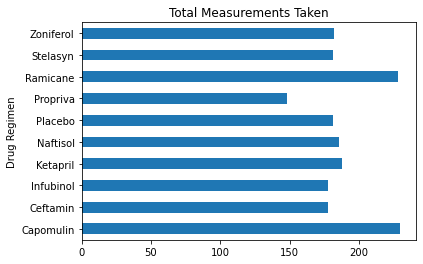

In [13]:
# Generate bar plot of measurements taken using DataFrame.plot
measurements_count['Timepoint'].plot(kind='barh', title='Total Measurements Taken')

In [14]:
# # Generate same plot using pyplot
# measurements_count['Timepoint']
# x_axis = np.arange(0, len(drug_list))
# tick_locations = []
# for x in x_axis:
#     tick_locations.append(x)

# plt.title("Total Measurments")
# plt.xlabel("Drug Regiment")
# plt.ylabel("Number of Measureme")

# plt.xlim(-0.75, len(gyms)-.25)
# plt.ylim(0, max(members) + 5)

# plt.bar(x_axis, members, facecolor="red", alpha=0.75, align="center")
# plt.xticks(tick_locations, drug_list)


<AxesSubplot:title={'center':'Gender of Mouse'}, ylabel='Sex'>

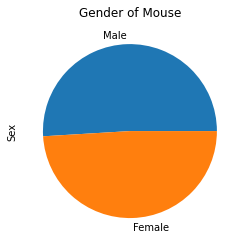

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# get datafor pie chart
sex_data = all_data_cleaned['Sex'].value_counts()
sex_data.plot(kind= 'pie', title= 'Gender of Mouse')

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


In [17]:
print(all_data_cleaned['Drug Regimen'].unique())



['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


In [18]:
# Drop other drugs from list
drug_data_four = all_data_cleaned.loc[all_data_cleaned['Drug Regimen'] != 'Naftisol']
drug_data_four = drug_data_four.loc[all_data_cleaned['Drug Regimen'] != 'Propriva']
drug_data_four = drug_data_four.loc[all_data_cleaned['Drug Regimen'] != 'Ketapril']
drug_data_four = drug_data_four.loc[all_data_cleaned['Drug Regimen'] != 'Zoniferol']
drug_data_four = drug_data_four.loc[all_data_cleaned['Drug Regimen'] != 'Stelasyn']
drug_data_four = drug_data_four.loc[all_data_cleaned['Drug Regimen'] != 'Placebo']
print(drug_data_four['Drug Regimen'].unique())

['Ramicane' 'Capomulin' 'Infubinol' 'Ceftamin']


In [19]:
# Group by mouse and Agg max timepoint
drug_data_four_group = drug_data_four.groupby(drug_data_four['Mouse ID'])
max_timepoint = drug_data_four_group['Timepoint'].max()
max_timepoint

Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 100, dtype: int64

In [20]:
# merge dfs to loop and remove other tp data
id_last_tp = pd.merge(max_timepoint, drug_data_four, on="Mouse ID")
id_last_tp

,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,0,45.000000,0
1,a203,45,Infubinol,Female,20,23,5,48.508468,0
2,a203,45,Infubinol,Female,20,23,10,51.852437,1
3,a203,45,Infubinol,Female,20,23,15,52.777870,1
4,a203,45,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...,...
809,z581,45,Infubinol,Female,24,25,25,54.316407,2
810,z581,45,Infubinol,Female,24,25,30,56.286750,2
811,z581,45,Infubinol,Female,24,25,35,58.628399,3
812,z581,45,Infubinol,Female,24,25,40,60.053740,3


In [21]:
# filter out other timepoints
filtered_tp = id_last_tp.loc[id_last_tp['Timepoint_y'] == id_last_tp['Timepoint_x']]
filtered_tp

,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
9,a203,45,Infubinol,Female,20,23,45,67.973419,2
19,a251,45,Infubinol,Female,21,25,45,65.525743,1
29,a275,45,Ceftamin,Female,20,28,45,62.999356,3
39,a411,45,Ramicane,Male,3,22,45,38.407618,1
49,a444,45,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...,...
773,y769,45,Ceftamin,Female,6,27,45,68.594745,4
783,y793,45,Capomulin,Male,17,17,45,31.896238,2
793,y865,45,Ceftamin,Male,23,26,45,64.729837,3
803,z578,45,Ramicane,Male,11,16,45,30.638696,0


In [22]:
filtered_tp['Tumor Volume (mm3)'].describe()

count    100.000000
mean      47.197795
std       12.953884
min       22.050126
25%       37.187744
50%       45.000000
75%       59.930262
max       72.226731
Name: Tumor Volume (mm3), dtype: float64

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [24]:
# create list of tumor volumes and sort
tumor_volumes = filtered_tp['Tumor Volume (mm3)']
tumor_volume_list = []
for row in tumor_volumes:
    tumor_volume_list.append(row)



Text(0, 0.5, 'Volume (mm3)')

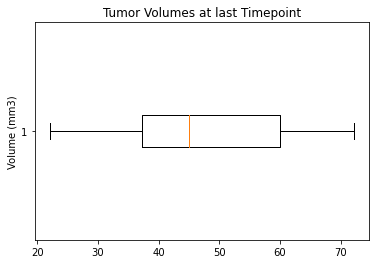

In [25]:
# Plot the data using a boxplot
fig1, ax1 = plt.subplots()

ax1.boxplot(tumor_volume_list, vert=False, flierprops= dict(markerfacecolor='green',markersize=12, marker='D'))

ax1.set_title('Tumor Volumes at last Timepoint')
ax1.set_ylabel('Volume (mm3)')

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

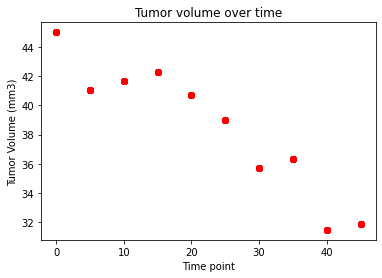

In [35]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# filter data to only Capomulin
plt.title('Tumor volume over time')
plt.xlabel('Time point')
plt.ylabel('Tumor Volume (mm3)')
x_values = []
y_values = []
capomulin_mouse = all_data_cleaned.loc[all_data_cleaned['Drug Regimen'] == 'Capomulin']
capomulin_mouse = capomulin_mouse.loc[capomulin_mouse['Mouse ID'] == 'y793']
capomulin_mouse
for row in capomulin_mouse:
    x_values.append(capomulin_mouse['Timepoint'])
    y_values.append(capomulin_mouse['Tumor Volume (mm3)'])
# capomulin_data.plot(capomulin_data[], capomulin_data['Tumor Volume (mm3)'])
plt.plot(x_values, y_values, marker="o", color="red", linewidth=2)

plt.show

In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
